In [2]:
import cv2

flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(len(flags))
print(flags[40])

374
COLOR_BAYER_GR2GRAY


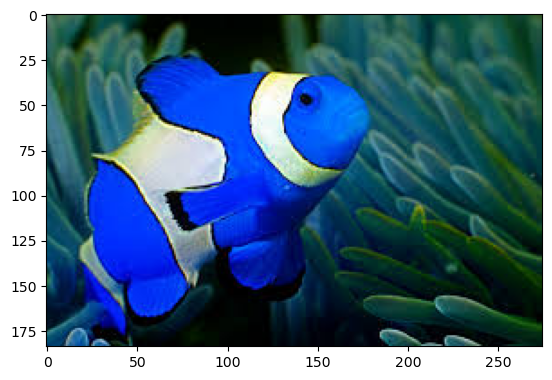

In [3]:
import matplotlib.pyplot as plt
import numpy as np

nemo = cv2.imread('./images/nemo0.jpg')
plt.imshow(nemo)
plt.show()
# 이미지 출력(GBR)

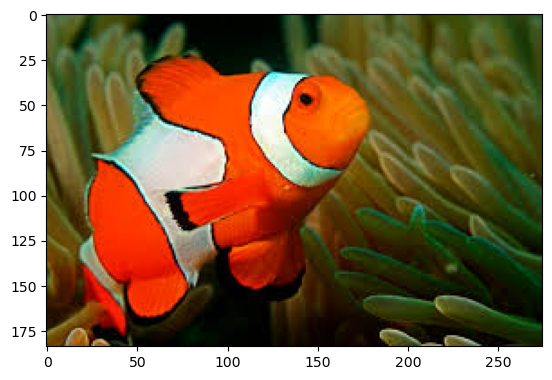

In [5]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()
# 이미지 출력(RGB)

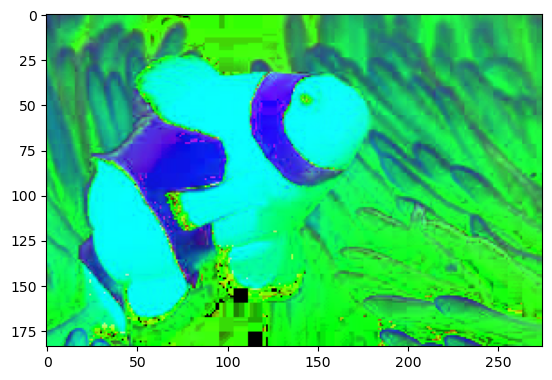

In [6]:
# 색을 뽑아내기 쉽도록 HSV 방식으로 변경
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_nemo)
plt.show()

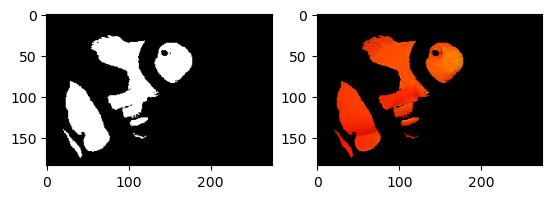

In [7]:
# 원하는 색 범위 mask 생성
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
result = cv2.bitwise_and(nemo, nemo, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

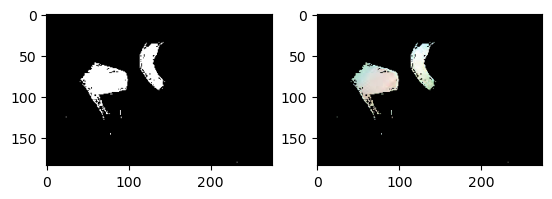

In [8]:
# 원하는 색 범위 mask 생성2
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

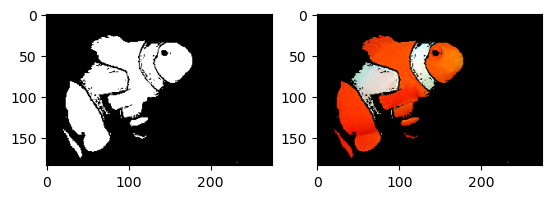

In [9]:
# mask1 + mask2
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()


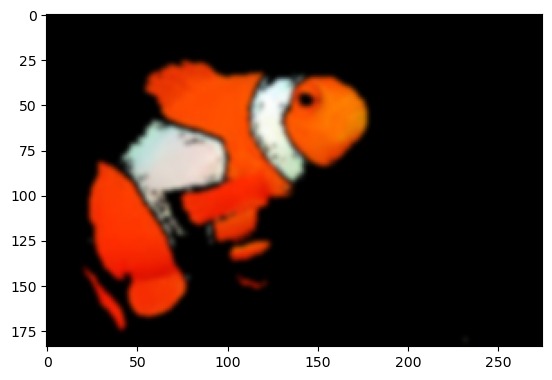

In [10]:
# use A Gaussian blur
blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(blur)
plt.show()

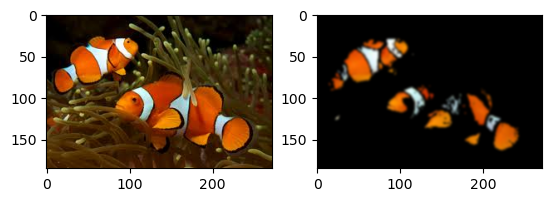

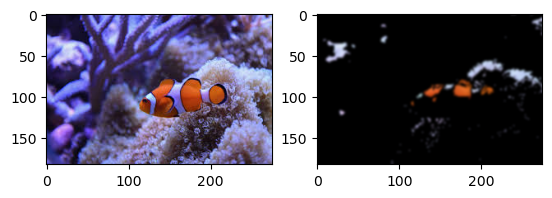

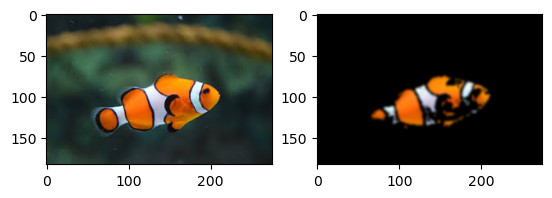

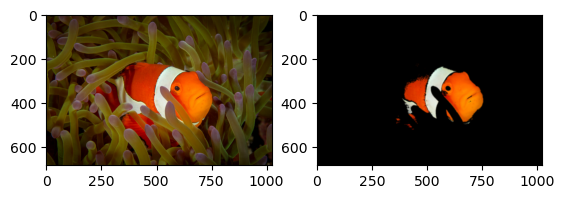

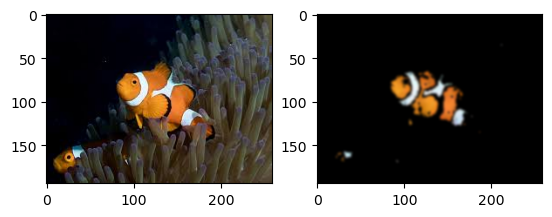

In [12]:
# Generalize to Nemos

path = "./images/nemo"

nemos_friends = []
for i in range(6):
   friend = cv2.cvtColor(cv2.imread(path + str(i) + ".jpg"), cv2.COLOR_BGR2RGB)
   nemos_friends.append(friend)

def segment_fish(image):
    ''' Attempts to segment the clownfish out of the provided image '''

    # Convert the image into HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Set the orange range
    light_orange = (1, 190, 200)
    dark_orange = (18, 255, 255)

    # Apply the orange mask 
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)

    # Set a white range
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)

    # Apply the white mask
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)

    # Combine the two masks
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)

    # Clean up the segmentation using a blur
    blur = cv2.GaussianBlur(result, (7, 7), 0)
    return blur


results = [segment_fish(friend) for friend in nemos_friends]

for i in range(1, 6):
    plt.subplot(1, 2, 1)
    plt.imshow(nemos_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()